We customize the output from `cabinetry` via a helper function. This is optional, and the `logging` module can be used directly as well to further customize the behavior.

In [1]:
import cabinetry
cabinetry.set_logging()

Download a workspace from HEPData, extract it, pick a signal with `pyhf`. We use a workspace from an ATLAS search for bottom-squark pair production: [JHEP 12 (2019) 060](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-31/). The corresponding HEPData entry is [10.17182/hepdata.89408.v3](https://doi.org/10.17182/hepdata.89408.v3).

In [2]:
import numpy as np
import matplotlib.pyplot as plt # for plotting

import json
import pyhf
from pyhf.contrib.utils import download
#https://www.hepdata.net/record/ins1869695, "4top"
#https://www.hepdata.net/record/ins1802524, "ttbar"
#https://www.hepdata.net/record/ins1843001, "leptoquark"
#https://www.hepdata.net/record/ins2905977, "vector-like lepton"
#https://www.hepdata.net/record/ins2043503, "displaced jets"
#https://www.hepdata.net/record/ins1847643, "Htb"

download("https://www.hepdata.net/record/resource/1935437?view=true", "bottom-squarks")
ws_bkg = pyhf.Workspace(json.load(open("bottom-squarks/RegionA/BkgOnly.json")))
patchset = pyhf.PatchSet(json.load(open("bottom-squarks/RegionA/patchset.json")))
ws = patchset.apply(ws_bkg, "sbottom_600_280_150")
#cabinetry.workspace.save(ws, "bottom-squarks.json")

#download("https://www.hepdata.net/record/resource/2695562?view=true", "leptoquark")
#ws_bkg = pyhf.Workspace(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/BGOnly.json")))
#patchset = pyhf.PatchSet(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/LQLQ_ttauttau_patchset.json")))
#ws = patchset.apply(ws_bkg, "LQd_M1000_B0p05")
# #jsonfile="LQLQ.json"
# #cabinetry.workspace.save(ws, jsonfile)

#download("https://www.hepdata.net/record/resource/3898139?view=true", "vectorlepton")
#ws = pyhf.Workspace(json.load(open("vectorlepton/json2/VLL_M1000.json")))

#download("https://www.hepdata.net/record/resource/3170100?view=true","displacedjets")

#download("https://www.hepdata.net/record/resource/1986718?view=true","Htb")
#ws = pyhf.Workspace(json.load(open("Htb/Hp1000_config.json")))

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.patchset - Validating spec against schema: patchset.json
INFO - pyhf.workspace - Validating spec against schema: workspace.json


The `bottom-squarks.json` workspace is now ready to be used. We will run a maximum likelihood fit with `cabinetry` and visualize the results. First, we have a brief look at the content of the workspace:

The fit model specified in the workspace is created next.

In [3]:
#ws = cabinetry.workspace.load(jsonfile)
#model, data = cabinetry.model_utils.model_and_data(ws)
#ws=ws_bkg

model =  ws.model()
data   = ws.data(model)

INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier EG_RESOLUTION_ALL (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EG_SCALE_ALL (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_ChargeIDSel_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_TriggerEff_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier EL_EFF_Trigger_TOTAL_1NPCOR_PLUS_UNCOR (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier FT_EFF_B_systematics (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier FT_EFF_C_systematics (1 new nuisance parameters)
INFO - pyhf.pdf -

We can take a look at a yield table for this model. We first generate the pre-fit model prediction, and then pass it to a function to produce a yield table from it.

In [4]:
print("\nWorkspace info")
print(f'     samples: {ws.samples}')
print(f'   modifiers: {ws.modifiers}')
print(f'    channels: {ws.channels}')
print(f'       nbins: {ws.channel_nbins}')
#print(f'  parameters: {ws.parameters}')
print(f'observations: {ws.observations}')
print(f' measurement: {ws.measurement_names}')
print(f' measurement: {ws.get_measurement}') #Can feed poi name of measuremnt name
print(f' data: {ws.data}')
print(f' model: {ws.model}')
print("\n")



Workspace info
     samples: ['W', 'Z', 'diboson', 'sbottom_600_280_150', 'st', 'ttH', 'ttW', 'ttZ', 'ttbar']
   modifiers: [('EG_RESOLUTION_ALL', 'histosys'), ('EG_RESOLUTION_ALL', 'normsys'), ('EG_SCALE_ALL', 'histosys'), ('EG_SCALE_ALL', 'normsys'), ('EL_EFF_ChargeIDSel_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_TriggerEff_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Trigger_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('FT_EFF_B_systematics', 'histosys'), ('FT_EFF_B_systematics', 'normsys'), ('FT_EFF_C_systematics', 'histosys'), ('FT_EFF_C_systematics', 'normsys'), ('FT_EFF_Light_systematics', 'histosys'), ('FT_EFF_Light_systematics', 'normsys'), ('FT_EFF_extrapolation', 'his

In [5]:
print("\nConfig Info")
print(f'modifiers = {model.config.modifiers}')
print(f' channels = {model.config.channels}')
print(f'  auxdata = {model.config.auxdata}')
print(f' poi_name = {model.config.poi_name}')
print(f'poi_index = {model.config.poi_index}')
print(f'    npars = {model.config.npars}')
print(f'    param = {model.config.par_order}')
print(f'     init = {model.config.suggested_init()}')
print(f'    fixed = {model.config.suggested_fixed()}')
print(f'   bounds = {model.config.suggested_bounds()}')


Config Info
modifiers = [('EG_RESOLUTION_ALL', 'histosys'), ('EG_RESOLUTION_ALL', 'normsys'), ('EG_SCALE_ALL', 'histosys'), ('EG_SCALE_ALL', 'normsys'), ('EL_EFF_ChargeIDSel_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Iso_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Reco_TOTAL_1NPCOR_PLUS_UNCOR', 'normsys'), ('EL_EFF_TriggerEff_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('EL_EFF_Trigger_TOTAL_1NPCOR_PLUS_UNCOR', 'histosys'), ('FT_EFF_B_systematics', 'histosys'), ('FT_EFF_B_systematics', 'normsys'), ('FT_EFF_C_systematics', 'histosys'), ('FT_EFF_C_systematics', 'normsys'), ('FT_EFF_Light_systematics', 'histosys'), ('FT_EFF_Light_systematics', 'normsys'), ('FT_EFF_extrapolation', 'histosys'), ('FT_EFF_extrapolation', 'normsys'), ('FT_EFF_extrapolation_from_charm', 'histosys'), ('FT_

In [6]:
print("\n Param info")
for k in model.config.par_order:
  print(f'  {k}')
  print(f'\tparam_set={model.config.param_set(k)}')
  print(f'\tn_parameters={model.config.param_set(k).n_parameters}')
  print(f'\tconstrained={model.config.param_set(k).constrained}')
  if model.config.param_set(k).constrained:
    print(f'\tpdf={model.config.param_set(k).pdf_type}')
    print(f'\tauxdata={model.config.param_set(k).auxdata}')
    #print(f'\tfactors={model.config.param_set(k).factors}')
    print(f'\twidth={model.config.param_set(k).width()}')
  print(f'\tinit={model.config.param_set(k).suggested_init}')
  print(f'\tbounds={model.config.param_set(k).suggested_bounds}')
  print(f'\tfixed={model.config.param_set(k).suggested_fixed}')
  print(f'\tslice={model.config.par_slice(k)}')


 Param info
  EG_RESOLUTION_ALL
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x163dae560>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(0, 1, None)
  EG_SCALE_ALL
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x163daf3d0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(1, 2, None)
  EL_EFF_ChargeIDSel_TOTAL_1NPCOR_PLUS_UNCOR
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x163daf850>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(2, 3, None)
  EL_EFF_ID_TOTAL_1NPCOR_PLUS_UNCOR
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x163dafca0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[

In [7]:
model_prefit = cabinetry.model_utils.prediction(model)
_ = cabinetry.tabulate.yields(model_prefit, data)

DEBUG - cabinetry.model_utils - total stdev is [[15.641424923032599, 9.639106584636352, 5.157819438647223], [2.7535327510104506, 2.607355424465272, 3.399460937706964]]
DEBUG - cabinetry.model_utils - total stdev per channel is [17.966154436341565, 6.138514685975997]
INFO - cabinetry.tabulate - yields per bin for pre-fit model prediction:
╒═════════════════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ sample              │ CRtt_meff      │              │              │ SR_meff      │              │              │
│                     │ bin 1          │ bin 2        │ bin 3        │ bin 1        │ bin 2        │ bin 3        │
╞═════════════════════╪════════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ W                   │ 3.69 ± 1.10    │ 1.20 ± 0.48  │ 1.09 ± 0.60  │ 0.22 ± 0.10  │ 0.14 ± 0.05  │ 0.04 ± 0.01  │
├─────────────────────┼────────────────┼──────────────┼──────────────┼──────────

We can also visualize the pre-fit model prediction and compare it to data. the `visualize.data_mc` function returns a list of dictionaries containing the `matplotlib` figures, which we could use to customize them as needed. We do not need to customize anything here, so we assign the return value to `_`.

INFO - cabinetry.visualize.utils - saving figure as figures/CRtt_meff_prefit.pdf
INFO - cabinetry.visualize.utils - saving figure as figures/SR_meff_prefit.pdf


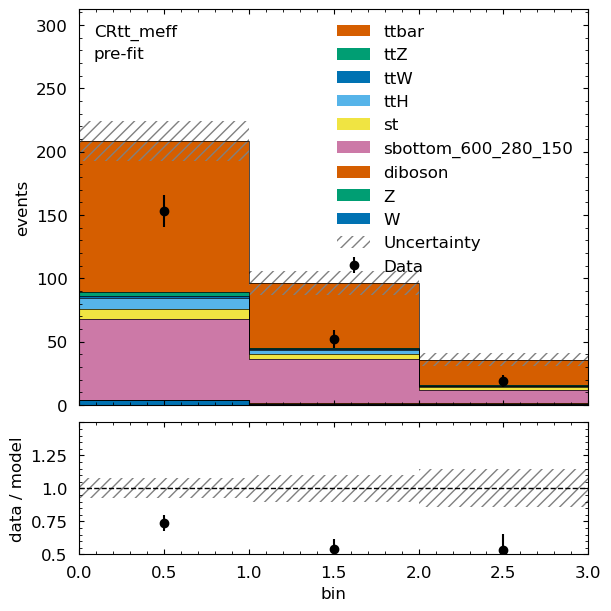

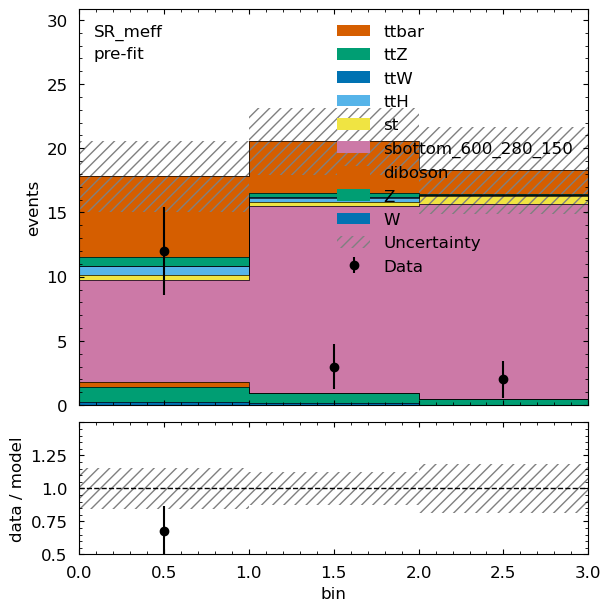

In [8]:
_ = cabinetry.visualize.data_mc(model_prefit, data)

Next up is a maximum likelihood fit. As we have limited sensitivity to the signal in this setup, we fit a background-only model with the signal normalization fixed to zero.

In [9]:
init_pars = model.config.suggested_init()
init_pars[model.config.poi_index] = 0

fix_pars = model.config.suggested_fixed()
fix_pars[model.config.poi_index] = True

fit_results = cabinetry.fit.fit(model, data, init_pars=init_pars, fix_pars=fix_pars)
print(fit_results)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.5                      │             Nfcn = 3497              │
│ EDM = 1.65e-05 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

FitResults(bestfit=array([ 4.44988825e-03, -7.21385887e-03,  0.00000000e+00, -1.66668246e-03,
       -2.89077000e-02,  3.37120561e-04,  0.00000000e+00,  0.00000000e+00,
       -8.40501103e-03, -2.32869054e-02, -1.41817575e-01, -9.92956861e-02,
       -6.98854020e-02,  3.08445373e-05,  1.03239414e-03, -6.51046834e-04,
       -1.16972209e-01,  3.91654493e-02,  8.64982272e-02, -8.21358741e-02,
        4.08685311e-03, -1.41084753e-02, -9.97270309e-03, -1.02097180e-02,
       -1.19483854e-02, -1.15833186e-02, -7.85761447e-03, -8.90231825e-03,
        6.48333138e-03, -1.07686650e-02, -5.23413356e-03,  2.50345775e-02,
        0.00000000e+00,  0.00000000e+00, -2.02725032e-04,  3.16472817e-04,
        1.32874497e-04,  5.88688090e-04,  1.58663150e-05,  1.37878016e-05,
        0.00000000e+00,  0.00000000e+00, -5.16206579e-03, -7.14989525e-03,
        1.66482311e-02,  0.00000000e+00, -2.50722227e-03, -3.38374561e-01,
        5.29774518e-01,  6.41606751e-01,  1.63237871e-01, -1.71826401e-01,
      

We can now visualize the post-fit distributions. To do so, we need a post-fit model prediction. It is obtained like the pre-fit model prediction, but this time with an additional argument to pass in the fit results.

DEBUG - cabinetry.model_utils - total stdev is [[11.290989551560827, 5.347361372106097, 3.142150687529063], [1.613259732037739, 0.8432001178746955, 0.9134229571515438]]
DEBUG - cabinetry.model_utils - total stdev per channel is [14.66655895849288, 2.1779036071873685]
INFO - cabinetry.visualize.utils - saving figure as figures/CRtt_meff_postfit.pdf
INFO - cabinetry.visualize.utils - saving figure as figures/SR_meff_postfit.pdf


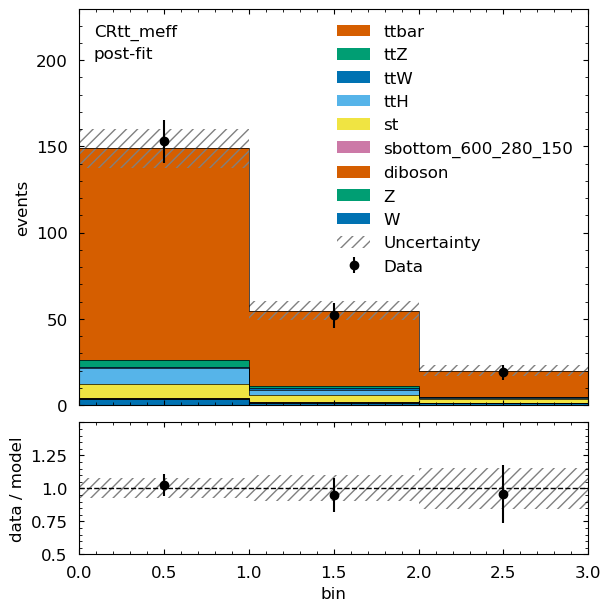

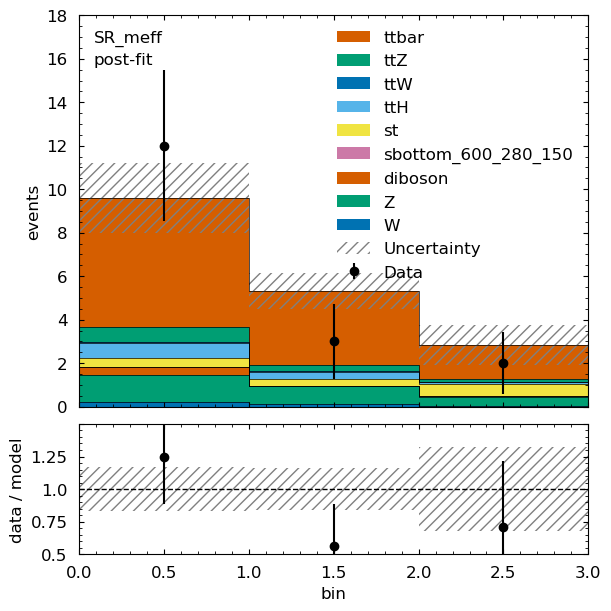

In [10]:
model_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(model_postfit, data)

The nuisance parameter pulls and correlations are visualized below.

INFO - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


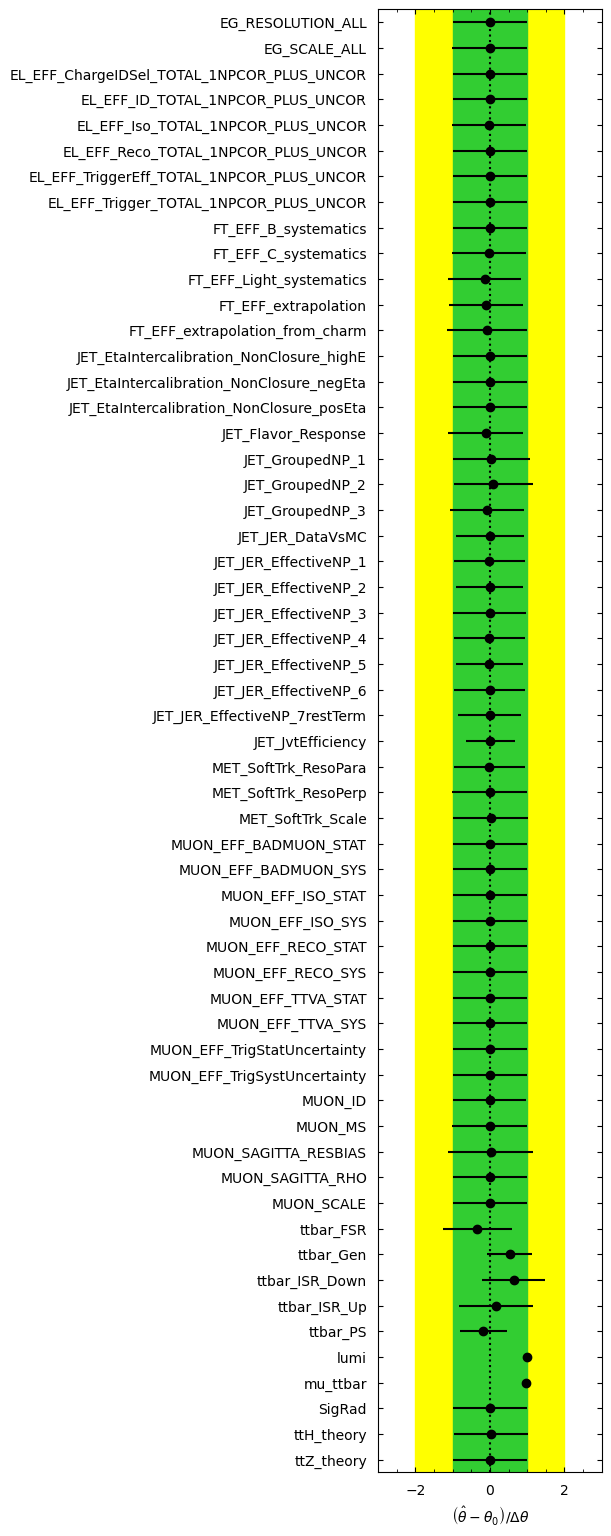

In [11]:
cabinetry.visualize.pulls(fit_results)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


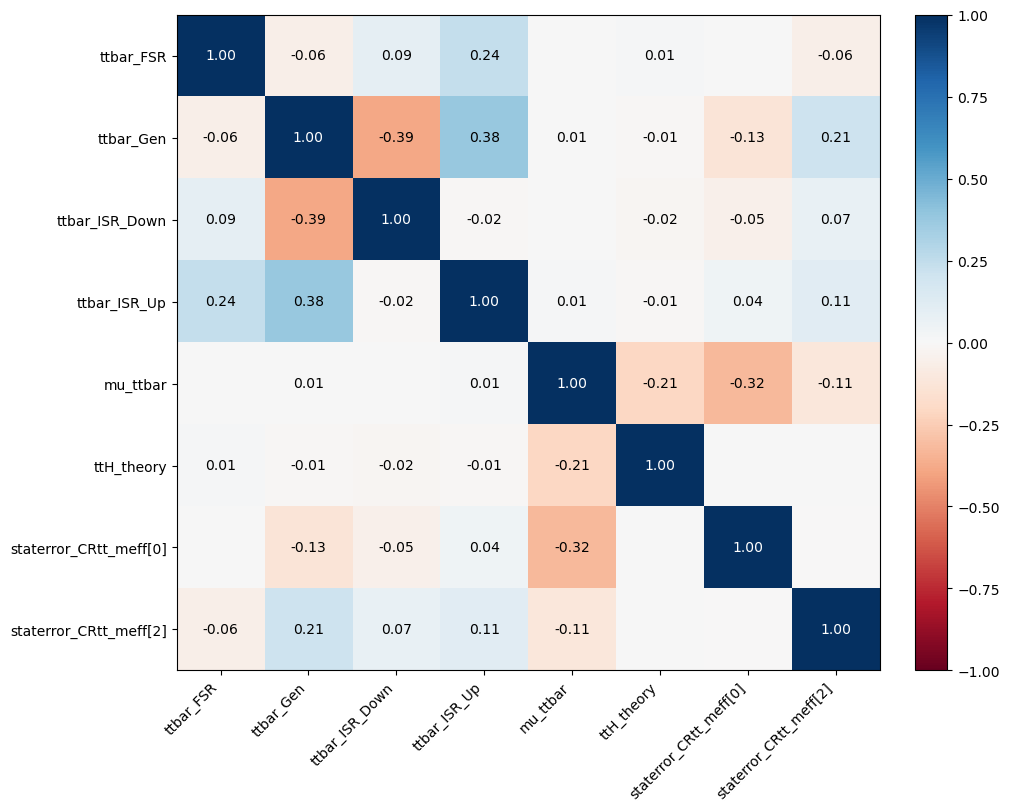

In [12]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.2)

In [13]:
#ranking_results = cabinetry.fit.ranking(model, data)
#cabinetry.visualize.ranking(ranking_results)

In [14]:
# poi_index=model.config.poi_index
# parameter_bounds = model.config.suggested_bounds()
# parameter_bounds[poi_index] = [-10.0, 10.0]

# scan_results = cabinetry.fit.scan(model, data, model.config.poi_name, par_range=[-10,10],par_bounds=parameter_bounds)
# cabinetry.visualize.scan(scan_results)

In [ ]:
poi_index=model.config.poi_index
parameter_bounds = model.config.suggested_bounds()
parameter_bounds[poi_index] = [-10.0, 100.0]

limit_results = cabinetry.fit.limit(model, data, par_bounds=parameter_bounds)
cabinetry.visualize.limit(limit_results)

INFO - cabinetry.fit - calculating 95% confidence level upper limit for mu_SIG
DEBUG - cabinetry.fit - setting lower parameter bound for POI to 0
INFO - cabinetry.fit - determining observed upper limit
DEBUG - cabinetry.fit - mu_SIG = 0.1000, observed CLs = 0.2218


W FCN result is NaN for [ 4.99398 4.98238 0 0 0 0 0 0 0 0 -4.99993 -4.98503 0 0 -4.33579 0 4.95717 -4.99992 -2.7957 0 0 -1.86374 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 100 1 0 0 0 1 1 1 1 1 1 ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 100 nan nan nan nan nan nan nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 100 nan nan nan nan nan nan nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

W FCN result is NaN for [ 4.99398 4.98238 0 0 0 0 0 0 0 0 -4.99993 -4.98503 0 0 -4.33579 0 4.95717 -4.99992 -2.7957 0 0 -0.770405 -1.06598 -0.321905 -0.129236 0 0 0 -0.487936 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 100 1 0 0 0 1 1 1 1 1 1 ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 100 nan nan nan nan nan nan nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 100 nan nan nan nan nan nan nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

W FCN result is NaN for [ 3.15549 4.25131 0 -4.01415 -4.11304 -1.34471 0 0 -1.76319 -3.24031 -4.99996 -4.25459 -0.210259 -0.0056379 -4.99999 0.0367591 2.26619 -5 -3.3889 -2.4649 -0.000126322 -0.659393 -0.684901 -0.287529 0.0776157 -0.000339569 -0.00147269 -0.0725332 -3.86796 1.93308 0.00135336 -1.04746 0 0 -0.267937 -3.83317 -2.06005 -4.99709 -0.354857 -0.146444 0 0 4.33263 4.32809 0.328927 0 -0.0449238 -1.10591 -0.406542 -0.133361 4.4318 1.2549 0.923034 100 1.42647 4.78344 -1.2687 0.0312668 0.897258 0.0193695 1.41698 1.10674 0.00011064 0.0347016 ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 100 nan nan nan nan nan nan nan nan nan nan ]
W FCN result is NaN for [ nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

In [ ]:
significance_results = cabinetry.fit.significance(model, data)
print(significance_results)

In [ ]:
#Dictionary to store all the results
results = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
    }

patchsets = ["sbottom_600_180_50","sbottom_700_131_1","sbottom_800_131_1"]
patchsets = ["LQd_M1000_B0p05","LQd_M2000_B0p05"]
#patchsets = ["Htb/Hp500_config.json","Htb/Hp1000_config.json","Htb/Hp1400_config.json","Htb/Hp2000_config.json"]

for patch in patchsets:
    # Apply the patch to build a patched model
    patched_ws = patchset.apply(ws_bkg, patch)
    #patched_ws = pyhf.Workspace(json.load(open(patch)))
    patched_model =  patched_ws.model()
    patched_data = patched_ws.data(patched_model)
    
    #Set to expected only
    pars = patched_model.config.suggested_init().copy()
    pars[patched_model.config.poi_index] = 0.0
    patched_data = patched_model.expected_data(pars)
    
    #Fix systematics:
    #fixed_params = [{"name": p, "fixed": False} for p in patched_model.config.parameters if p != patched_model.config.poi_name]
    fixed_params = [(p,p != patched_model.config.poi_name) for p in patched_model.config.parameters]
    #fixed_params = [{"name": p, "fixed": False} for p in patched_model.config.parameters]
    #fixed_params = model.config.suggested_fixed()
    #fixed_params = [p!= patched_model.config.poi_name for p in patched_model.config.parameters]
    
    fixed_params = [True for p in patched_model.config.parameters]
    fixed_params[patched_model.config.poi_index]=False
    
    #for ii,p in enumerate(patched_model.config.parameters): print(ii,p,p==patched_model.config.poi_name)
    
    print(fixed_params)
    print(patched_model.config.poi_name)
    print("POI:", patched_model.config.poi_name, patched_model.config.poi_index)
    #print("Frozen parameters:", [fp for fp in fixed_params])
    print(fixed_params[model.config.poi_index])    
    
    #Similar dictionary to hold the scan results for each patchset
    CLs = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
    }

    mu_values=np.linspace(0,3,10)
    #Scan over poi values
    for mu in mu_values:
        # observed CLs
        obs = pyhf.infer.hypotest(mu, patched_data, patched_model, test_stat="qtilde",fixed_params=fixed_params)
        CLs["obs"].append(obs)

        # expected bands
        exp,bands = pyhf.infer.hypotest(mu, patched_data, patched_model, test_stat="qtilde",fixed_params=fixed_params, return_expected_set=True)
        CLs["median"].append(exp)
        CLs["plus2"].append(bands[0])
        CLs["plus1"].append(bands[1])
        CLs["minus1"].append(bands[2])
        CLs["minus2"].append(bands[3])
        
        print(f"For {patch} and poi={mu}: obs={obs}, exp={exp}, bands=({bands[3]},{bands[2]},{bands[1]},{bands[0]})")

    # Interpolate where CLs = 0.05
    results["obs"].append(np.interp(0.05, CLs["obs"][::-1], mu_values[::-1])) #[::-1] just to reverse the list for np.interp
    results["median"].append(np.interp(0.05, CLs["median"][::-1], mu_values[::-1]))
    results["minus1"].append(np.interp(0.05, CLs["minus1"][::-1], mu_values[::-1]))
    results["minus2"].append(np.interp(0.05, CLs["minus2"][::-1], mu_values[::-1]))
    results["plus1"].append(np.interp(0.05, CLs["plus1"][::-1], mu_values[::-1]))
    results["plus2"].append(np.interp(0.05, CLs["plus2"][::-1], mu_values[::-1]))

In [ ]:
print(results)

In [ ]:
x = np.arange(len(results["obs"]))  # Replace with real mass points if available

plt.figure(figsize=(8,5))

# +/-  1/2sigma band (green,yellow)
plt.fill_between(x, results["minus2"], results["plus2"], color="gold", label=r"$\pm 2\sigma$ expected", alpha=0.6)
plt.fill_between(x, results["minus1"], results["plus1"], color="limegreen", label=r"$\pm 1\sigma$ expected", alpha=0.8)

# Median expected
plt.plot(x, results["median"], linestyle="--", color="gray", label="Expected")

# Observed
plt.plot(x, results["obs"], linestyle="", color="black", marker="o", label="Observed")

plt.xlabel("Signal Model Index (or Mass)")
plt.ylabel(r"95% CL Upper Limit on $\mu$")
plt.title("Exclusion Limits Across Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
